### Basic comparison pizza chart to compare two players
The PFA released their Team of the season for the 2021-22 Premier League season. Thiago Alcântara of Liverpool FC was included in the midfield three. Many fans questioned the PFA's decision for the inclusion ahead of the likes of Rodri of Manchester City and Declan Rice of Westham United. Let's compare their stats and see who deserves the spot.

In [1]:
# import necessary packages and modules
import pandas as pd
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager
from highlight_text import fig_text
 
import matplotlib.pyplot as plt

    

In [2]:
# if highlight_text is not installed
# pip install highlight_text

In [3]:
# read the csv file for our analysis
player_df = pd.read_csv('thiago v rodri v rice - Sheet1.csv')

In [4]:
# view the dataframe
player_df 

,Player,Passes Completed,Passes Attempted,Pass Completion %,Total Passing Distance,Progressive Passing Distance,Carries,Total Carrying Distance,Progressive Carrying Distance,Progressive Carries,Carries into Final Third,Interceptions,Tackles Won,Ball Recoveries,Successful Pressure %,% of Aerials Won
0,Thiago,98,98,92,99,98,99,95,95,98,96,88,94,96,90,95
1,Rodri,99,99,98,99,94,99,91,89,88,66,38,62,93,82,99
2,Rice,84,77,94,88,82,80,98,97,91,93,95,56,60,56,84


In [5]:
# get the params
params = list(player_df.columns)
params

['Player',
 'Passes Completed',
 'Passes Attempted',
 'Pass Completion %',
 'Total Passing Distance',
 'Progressive Passing Distance',
 'Carries',
 'Total Carrying Distance',
 'Progressive Carrying Distance',
 'Progressive Carries',
 'Carries into Final Third',
 'Interceptions',
 'Tackles Won',
 'Ball Recoveries',
 'Successful Pressure %',
 '% of Aerials Won']

In [6]:
# we don't need the Player column for our analysis so we remove it from params
params = params[1:]
params

['Passes Completed',
 'Passes Attempted',
 'Pass Completion %',
 'Total Passing Distance',
 'Progressive Passing Distance',
 'Carries',
 'Total Carrying Distance',
 'Progressive Carrying Distance',
 'Progressive Carries',
 'Carries into Final Third',
 'Interceptions',
 'Tackles Won',
 'Ball Recoveries',
 'Successful Pressure %',
 '% of Aerials Won']

In [7]:
# edit the params so it will come out nice when we plot
params = ['Passes\nCompleted',
 'Passes\nAttd',
 'Pass\nComplt %',
 'Total\nPassing Dist',
 'Progressive\nPassing Dist',
 'Carries',
 'Total\nCarrying Dist',
 'Progressive\nCarrying Dist',
 'Progressive\nCarries',
 'Carries\nFinal Third',
 'Interceptions',
 'Tackles Won',
 'Ball\nRecoveries',
 'Successful\nPressure %',
 '% Aerials Won']

In [8]:
# select values for players
player1 = list(player_df.loc[0])
player1

['Thiago', 98, 98, 92, 99, 98, 99, 95, 95, 98, 96, 88, 94, 96, 90, 95]

In [9]:
# we don't need the Player's name for our analysis
player1 = player1[1:]
player1

[98, 98, 92, 99, 98, 99, 95, 95, 98, 96, 88, 94, 96, 90, 95]

In [10]:
player2 = list(player_df.loc[1])
player2

['Rodri', 99, 99, 98, 99, 94, 99, 91, 89, 88, 66, 38, 62, 93, 82, 99]

In [11]:
player2 = player2[1:]
player2

[99, 99, 98, 99, 94, 99, 91, 89, 88, 66, 38, 62, 93, 82, 99]

In [12]:
player3 = list(player_df.loc[2])
player3

['Rice', 84, 77, 94, 88, 82, 80, 98, 97, 91, 93, 95, 56, 60, 56, 84]

In [13]:
player3 = player3[1:]
player3

[84, 77, 94, 88, 82, 80, 98, 97, 91, 93, 95, 56, 60, 56, 84]

In [14]:
# append player 1, 2, 3 values to a list
values = []
for x in range(len(params)):
    values.append(player1[x])
values

[98, 98, 92, 99, 98, 99, 95, 95, 98, 96, 88, 94, 96, 90, 95]

In [15]:
values_2 = []
for x in range(len(params)):
    values_2.append(player2[x])
values_2

[99, 99, 98, 99, 94, 99, 91, 89, 88, 66, 38, 62, 93, 82, 99]

In [16]:
# confirm the params and list of values are the same length 
print(len(params), len(values), len(values_2))

15 15 15


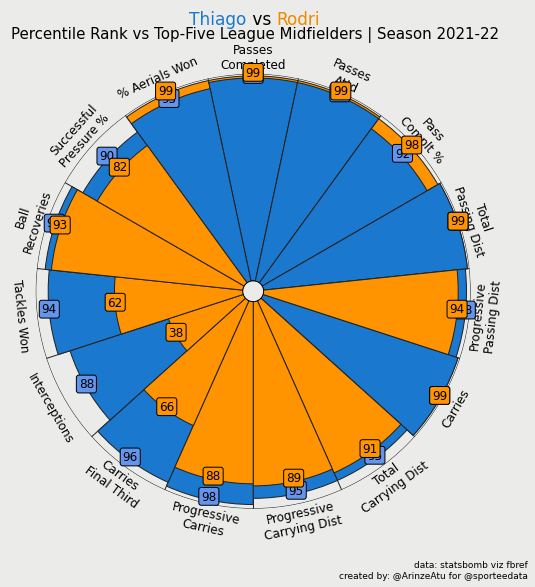

In [17]:
# let's plot
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.99, "<Thiago> vs <Rodri>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Midfielders | Season 2021-22",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "created by: @ArinzeAtu for @sporteedata"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.show()

In [18]:
values_2 = []
for x in range(len(params)):
    values_2.append(player3[x])
values_2

[84, 77, 94, 88, 82, 80, 98, 97, 91, 93, 95, 56, 60, 56, 84]

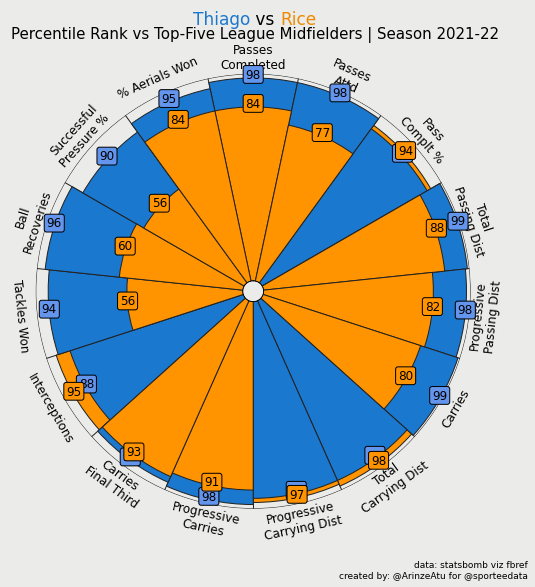

In [19]:
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.99, "<Thiago> vs <Rice>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Midfielders | Season 2021-22",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "created by: @ArinzeAtu for @sporteedata"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.show()

### Conclusion
It is clear that Thiago Alcântara had a better individual performance in the 2021-22 season than Rodri and Declan Rice and rightfully deserves his spot in the PFA Team of the season.